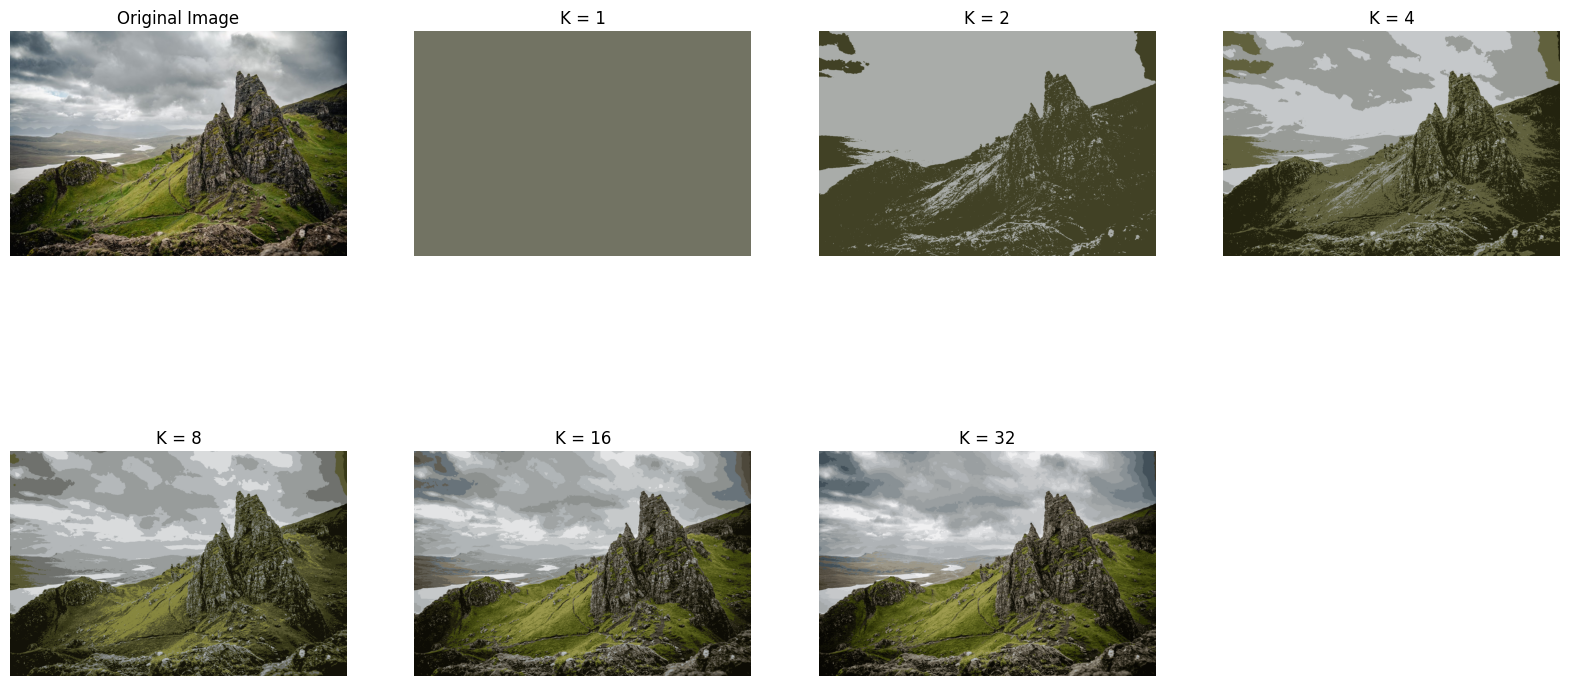

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image_path = 'Stones.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to perform K-means quantization
def quantize_image(image, k):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    
    # Reshape back to the original image shape
    quantized_image = new_colors.reshape(image.shape).astype(np.uint8)
    
    return quantized_image

# Number of clusters for quantization
clusters = [1, 2, 4, 8, 16, 32]

# Plot the original and quantized images
plt.figure(figsize=(20, 10))
plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(clusters):
    quantized_image = quantize_image(image, k)
    plt.subplot(2, 4, i+2)
    plt.imshow(quantized_image)
    plt.title(f'K = {k}')
    plt.axis('off')

plt.show()
